In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
epi_dir = '/Volumes/umms-esnitkin/Project_KPC_LTACH/Analysis/LTACH_transmission_modeling/data'

df_ftrace = pd.read_csv(f"{epi_dir}/2019-12-18_facility_trace.csv", index_col=0)
df_ftrace.columns = np.arange(367)

# recover facility trace
ftrace = (df_ftrace > 0).astype(int)

# recover infections
# how does this handle people who are 
infections = df_ftrace.replace(1, np.nan).ffill(axis=1)
infections = infections.replace({0:np.nan, 1.25:0, 1.5:1})

In [57]:
df_floor = pd.read_csv(f"{epi_dir}/2019-12-18_floor_trace.csv", index_col=0)
df_room = pd.read_csv(f"{epi_dir}/2019-12-18_room_trace.csv", index_col=0)

In [58]:
df_floor.head()

,15509,15510,15511,15512,15513,15514,15515,15516,15517,15518,...,15866,15867,15868,15869,15870,15871,15872,15873,15874,15875
1,3,3,3,3,3,3,3,3,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
infections_cleaned = infections.copy()
for i, row in infections_cleaned.iterrows():
    infected = False
    for j, v in row.items():
        if infected:
            if v == 0:
                # does someone test negative after testing positive in a visit?
                # overwrite that test result
                row[j] = 1
        if v == 1:
            infected = True
        if np.isnan(v):
            infected = False

In [39]:
df_screen = pd.DataFrame(index=df_ftrace.index, columns=df_ftrace.columns)
for n, r in df_ftrace.iterrows():
    entry_time = 0
    entered = False
    recorded = False
    for t, v in r.items():
        if v > 0 and not entered:
            entry_time = t
            entered = True
        if entered and v == 0:
            entered = False
            recorded = False
        if v > 1 and not recorded:
            test_time = t - entry_time
            if test_time < 3:
                df_screen.loc[n, entry_time] = 1 if v == 1.5 else 0
                # fix this in infections cleaned?
                infections_cleaned.loc[n, entry_time] = 1 if v == 1.5 else 0
            else:
                df_screen.loc[n,entry_time] = 0
                infections_cleaned.loc[n, entry_time] = 0
            recorded = True
# df_screen.replace({1.5:1, 1.25:0}, inplace=True)

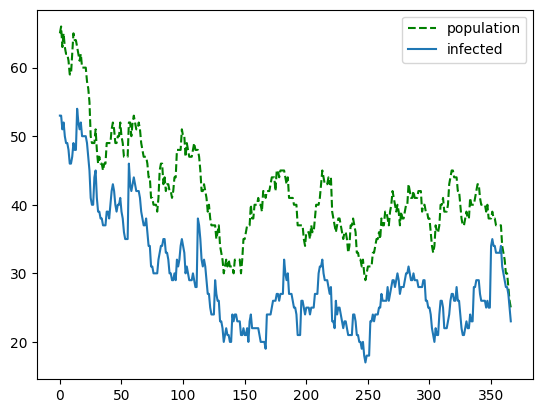

In [45]:
sns.lineplot(ftrace.sum(0), color="green", linestyle="--", label="population")
sns.lineplot(infections_cleaned.sum(0), label="infected")
plt.show()

In [47]:
# something to figure out...how to recover "novel" infections?

### Save

In [48]:
ftrace.head()

,0,1,2,3,4,5,6,7,8,9,...,357,358,359,360,361,362,363,364,365,366
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
infections_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,...,357,358,359,360,361,362,363,364,365,366
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_screen.head()

,0,1,2,3,4,5,6,7,8,9,...,357,358,359,360,361,362,363,364,365,366
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# write out data
# epi_dir = '/Volumes/umms-esnitkin/Project_KPC_LTACH/Analysis/LTACH_transmission_modeling/data'
output_dir = '/Volumes/umms-esnitkin/Project_KPC_LTACH/Analysis/LTACH_transmission_modeling/preprocessed'
ftrace.to_csv(f"{output_dir}/facility_trace.csv")
infections_cleaned.to_csv(f"{output_dir}/infections.csv")
df_screen.to_csv(f"{output_dir}/screening.csv")
df_floor.to_csv(f"{output_dir}/floor_trace.csv")
df_room.to_csv(f"{output_dir}/room_trace.csv")